In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder

from sklearn.ensemble import RandomForestClassifier
import xgboost
from xgboost import XGBClassifier

from sklearn.metrics import accuracy_score, classification_report, f1_score

In [2]:
data = pd.read_csv("/content/drive/MyDrive/DATATHON - THE DATA SQUAD/Cleaned Academic Survey.csv")
data.head()

,Timestamp,Age,Gender,Class,Class Type,Location,Type of School,Nature of School,Quality of Teaching,Academic Performance Feedback,...,Intelligence Rating,Type of Student,Confidence in Ability,Ability to solve problems,Learning Style,Preparatory CBT,Number of preparatory CBT taken,Number of extra lessons attended,Method of Exam Preparation,Daily Study Hours
0,2024-10-02 21:41:42.214,18 and above,Male,Graduate,Science,Suburban,Private,Day,Excellent,Always,...,Much higher than average,Excellent,Extremely confident,Always,"Visual (learning through seeing, e.g., diagram...",Yes,1-2,Less than once a week,Studying alone,3-4 hours
1,2024-10-02 21:41:45.763,18 and above,Male,Graduate,Science,Urban,Private,Day,Excellent,Always,...,Much higher than average,Excellent,Extremely confident,Sometimes,Reading/Writing (learning through reading and ...,No,NaN,Less than once a week,Studying alone,More than 6 hours
2,2024-10-02 21:48:14.448,18 and above,Female,Graduate,Science,Urban,Public,Day,Excellent,Often,...,Much higher than average,Excellent,Extremely confident,Often,"Kinesthetic (learning through doing, e.g., han...",Yes,More than 5,3-4 times a week,Attending extra lessons,3-4 hours
3,2024-10-02 22:41:19.957,18 and above,Male,Graduate,Science,Suburban,Private,Day,Good,Often,...,Slightly above average,Above Average,Moderately confident,Always,"Visual (learning through seeing, e.g., diagram...",No,NaN,Less than once a week,Studying alone,1-2 hours
4,2024-10-03 01:18:20.571,18 and above,Female,Graduate,Science,Urban,Private,Day,Excellent,Often,...,Slightly above average,Above Average,Very confident,Sometimes,"Auditory (learning through listening, e.g., le...",Yes,3-5,Less than once a week,Studying alone,5-6 hours


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 72 entries, 0 to 71
Data columns (total 33 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   Timestamp                              72 non-null     object 
 1   Age                                    72 non-null     object 
 2   Gender                                 72 non-null     object 
 3   Class                                  72 non-null     object 
 4   Class Type                             72 non-null     object 
 5   Location                               72 non-null     object 
 6   Type of School                         72 non-null     object 
 7   Nature of School                       72 non-null     object 
 8   Quality of Teaching                    72 non-null     object 
 9   Academic Performance Feedback          72 non-null     object 
 10  Quality of Teachers                    72 non-null     object 
 11  Availabi

In [4]:
data["Class"].value_counts()

,count
Class,
Graduate,53
SS3,14
SS2,3
SS1,2


In [5]:
train_data = data[(data["Class"]=="Graduate")]
train_data

,Timestamp,Age,Gender,Class,Class Type,Location,Type of School,Nature of School,Quality of Teaching,Academic Performance Feedback,...,Intelligence Rating,Type of Student,Confidence in Ability,Ability to solve problems,Learning Style,Preparatory CBT,Number of preparatory CBT taken,Number of extra lessons attended,Method of Exam Preparation,Daily Study Hours
0,2024-10-02 21:41:42.214,18 and above,Male,Graduate,Science,Suburban,Private,Day,Excellent,Always,...,Much higher than average,Excellent,Extremely confident,Always,"Visual (learning through seeing, e.g., diagram...",Yes,1-2,Less than once a week,Studying alone,3-4 hours
1,2024-10-02 21:41:45.763,18 and above,Male,Graduate,Science,Urban,Private,Day,Excellent,Always,...,Much higher than average,Excellent,Extremely confident,Sometimes,Reading/Writing (learning through reading and ...,No,NaN,Less than once a week,Studying alone,More than 6 hours
2,2024-10-02 21:48:14.448,18 and above,Female,Graduate,Science,Urban,Public,Day,Excellent,Often,...,Much higher than average,Excellent,Extremely confident,Often,"Kinesthetic (learning through doing, e.g., han...",Yes,More than 5,3-4 times a week,Attending extra lessons,3-4 hours
3,2024-10-02 22:41:19.957,18 and above,Male,Graduate,Science,Suburban,Private,Day,Good,Often,...,Slightly above average,Above Average,Moderately confident,Always,"Visual (learning through seeing, e.g., diagram...",No,NaN,Less than once a week,Studying alone,1-2 hours
4,2024-10-03 01:18:20.571,18 and above,Female,Graduate,Science,Urban,Private,Day,Excellent,Often,...,Slightly above average,Above Average,Very confident,Sometimes,"Auditory (learning through listening, e.g., le...",Yes,3-5,Less than once a week,Studying alone,5-6 hours
5,2024-10-03 02:16:08.576,18 and above,Male,Graduate,Science,Suburban,Private,Day,Good,Often,...,Average,Average,Moderately confident,Often,"Visual (learning through seeing, e.g., diagram...",Yes,More than 5,Less than once a week,Studying alone,1-2 hours
6,2024-10-03 03:50:46.255,18 and above,Male,Graduate,Science,Rural,Private,Day,Average,Sometimes,...,Slightly above average,Above Average,Slightly confident,Often,"Visual (learning through seeing, e.g., diagram...",Yes,1-2,Daily,Studying alone,3-4 hours
7,2024-10-03 06:52:20.819,18 and above,Male,Graduate,Science,Urban,Public,Day,Good,Often,...,Slightly above average,Above Average,Very confident,Often,Reading/Writing (learning through reading and ...,Yes,1-2,Less than once a week,Studying alone,3-4 hours
9,2024-10-03 11:34:22.425,14 - 15,Female,Graduate,Arts,Suburban,Private,Day,Excellent,Always,...,Much lower than average,Average,Moderately confident,Never,Reading/Writing (learning through reading and ...,Yes,1-2,Less than once a week,Studying alone,1-2 hours
11,2024-10-03 11:45:34.283,16 - 17,Female,Graduate,Science,Suburban,Public,Day,Excellent,Always,...,Much higher than average,Excellent,Moderately confident,Often,"Visual (learning through seeing, e.g., diagram...",Yes,3-5,3-4 times a week,Studying alone,3-4 hours


In [6]:
test_data = data[data["Class"]!="Graduate"]
test_data

,Timestamp,Age,Gender,Class,Class Type,Location,Type of School,Nature of School,Quality of Teaching,Academic Performance Feedback,...,Intelligence Rating,Type of Student,Confidence in Ability,Ability to solve problems,Learning Style,Preparatory CBT,Number of preparatory CBT taken,Number of extra lessons attended,Method of Exam Preparation,Daily Study Hours
8,2024-10-03 10:58:59.577,14 - 15,Female,SS2,Arts,Urban,Public,Boarding,Good,Sometimes,...,Average,Average,Moderately confident,Often,"Visual (learning through seeing, e.g., diagram...",Yes,3-5,1-2 times a week,Studying alone,1-2 hours
10,2024-10-03 11:40:15.510,16 - 17,Male,SS2,Commercial,Urban,Private,Day,Good,Sometimes,...,Average,Average,Moderately confident,Often,"Visual (learning through seeing, e.g., diagram...",Yes,1-2,1-2 times a week,Studying alone,3-4 hours
15,2024-10-03 11:53:58.872,16 - 17,Female,SS1,Commercial,Urban,Public,Day,Average,Sometimes,...,Average,Average,Moderately confident,Rarely,"Visual (learning through seeing, e.g., diagram...",No,NaN,Daily,Studying alone,3-4 hours
27,2024-10-03 13:39:38.381,14 - 15,Male,SS1,Arts,Urban,Private,Day,Good,Sometimes,...,Average,Average,Moderately confident,Sometimes,"Visual (learning through seeing, e.g., diagram...",No,NaN,Less than once a week,Studying alone,3-4 hours
38,2024-10-03 14:35:00.906,18 and above,Female,SS3,Arts,Suburban,Private,Boarding,Excellent,Often,...,Slightly above average,Above Average,Very confident,Often,"Visual (learning through seeing, e.g., diagram...",No,NaN,Less than once a week,Studying alone,1-2 hours
42,2024-10-03 15:06:47.695,14 - 15,Female,SS2,Arts,Urban,Private,Day,Good,Rarely,...,Much higher than average,Excellent,Extremely confident,Always,"Visual (learning through seeing, e.g., diagram...",Yes,3-5,1-2 times a week,Studying alone,1-2 hours
47,2024-10-03 17:23:07.936,14 - 15,Female,SS3,Commercial,Rural,Private,Day,Average,Rarely,...,Average,Below Average,Slightly confident,Often,"Visual (learning through seeing, e.g., diagram...",Yes,NaN,1-2 times a week,Studying alone,1-2 hours
50,2024-10-03 18:19:47.433,14 - 15,Female,SS3,Science,Urban,Private,Day,Good,Often,...,Slightly above average,Excellent,Very confident,Often,"Visual (learning through seeing, e.g., diagram...",No,NaN,Daily,Studying alone,3-4 hours
51,2024-10-03 18:22:37.344,14 - 15,Female,SS3,Science,Urban,Private,Day,Good,Often,...,Slightly above average,Above Average,Very confident,Often,"Visual (learning through seeing, e.g., diagram...",Yes,1-2,Daily,Studying alone,1-2 hours
52,2024-10-03 18:27:45.990,14 - 15,Female,SS3,Science,Urban,Private,Day,Excellent,Always,...,Much higher than average,Excellent,Moderately confident,Always,"Visual (learning through seeing, e.g., diagram...",No,NaN,Daily,Attending extra lessons,3-4 hours


In [7]:
train_data["Number of credits and above in WASSCE"].value_counts()

,count
Number of credits and above in WASSCE,
9.0,21
5.0,10
0.0,6
8.0,4
7.0,4
6.0,3
3.0,2
1.0,1
4.0,1


In [8]:
train_data["Jamb Score"].value_counts()

,count
Jamb Score,
0.0,8
250.0,2
291.0,2
221.0,2
262.0,2
236.0,2
304.0,1
218.0,1
244.0,1


In [9]:
test_data["Number of credits and above in WASSCE"].value_counts()

,count
Number of credits and above in WASSCE,
0.0,19


In [10]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 53 entries, 0 to 71
Data columns (total 33 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   Timestamp                              53 non-null     object 
 1   Age                                    53 non-null     object 
 2   Gender                                 53 non-null     object 
 3   Class                                  53 non-null     object 
 4   Class Type                             53 non-null     object 
 5   Location                               53 non-null     object 
 6   Type of School                         53 non-null     object 
 7   Nature of School                       53 non-null     object 
 8   Quality of Teaching                    53 non-null     object 
 9   Academic Performance Feedback          53 non-null     object 
 10  Quality of Teachers                    53 non-null     object 
 11  Availability 

In [11]:
train_data = train_data.fillna("None")

In [12]:
train_data.isna().sum()

,0
Timestamp,0
Age,0
Gender,0
Class,0
Class Type,0
Location,0
Type of School,0
Nature of School,0
Quality of Teaching,0
Academic Performance Feedback,0


In [13]:
features = train_data.drop(["Timestamp", "Home Study", "Quality of Teachers", "Academic-related Stress", "Preparatory CBT", "Type of Student", "Class", "Number of credits and above in WASSCE", "Jamb Score"], axis=1)

In [14]:
features

,Age,Gender,Class Type,Location,Type of School,Nature of School,Quality of Teaching,Academic Performance Feedback,Availability of Learning Resources,Learning Environment,...,Academic Motivation,Sources of Stress,Intelligence Rating,Confidence in Ability,Ability to solve problems,Learning Style,Number of preparatory CBT taken,Number of extra lessons attended,Method of Exam Preparation,Daily Study Hours
0,18 and above,Male,Science,Suburban,Private,Day,Excellent,Always,Adequate,5,...,Very High,"Academic pressure, Financial issues",Much higher than average,Extremely confident,Always,"Visual (learning through seeing, e.g., diagram...",1-2,Less than once a week,Studying alone,3-4 hours
1,18 and above,Male,Science,Urban,Private,Day,Excellent,Always,Very Adequate,5,...,Moderate,Financial issues,Much higher than average,Extremely confident,Sometimes,Reading/Writing (learning through reading and ...,None,Less than once a week,Studying alone,More than 6 hours
2,18 and above,Female,Science,Urban,Public,Day,Excellent,Often,Adequate,3,...,High,Family expectations,Much higher than average,Extremely confident,Often,"Kinesthetic (learning through doing, e.g., han...",More than 5,3-4 times a week,Attending extra lessons,3-4 hours
3,18 and above,Male,Science,Suburban,Private,Day,Good,Often,Adequate,3,...,Moderate,"Financial issues, Social relationships",Slightly above average,Moderately confident,Always,"Visual (learning through seeing, e.g., diagram...",None,Less than once a week,Studying alone,1-2 hours
4,18 and above,Female,Science,Urban,Private,Day,Excellent,Often,Very Adequate,4,...,High,Academic pressure,Slightly above average,Very confident,Sometimes,"Auditory (learning through listening, e.g., le...",3-5,Less than once a week,Studying alone,5-6 hours
5,18 and above,Male,Science,Suburban,Private,Day,Good,Often,Adequate,4,...,Moderate,Social relationships,Average,Moderately confident,Often,"Visual (learning through seeing, e.g., diagram...",More than 5,Less than once a week,Studying alone,1-2 hours
6,18 and above,Male,Science,Rural,Private,Day,Average,Sometimes,Neutral,3,...,Moderate,"Academic pressure, Financial issues",Slightly above average,Slightly confident,Often,"Visual (learning through seeing, e.g., diagram...",1-2,Daily,Studying alone,3-4 hours
7,18 and above,Male,Science,Urban,Public,Day,Good,Often,Neutral,4,...,High,"Academic pressure, Financial issues, Social re...",Slightly above average,Very confident,Often,Reading/Writing (learning through reading and ...,1-2,Less than once a week,Studying alone,3-4 hours
9,14 - 15,Female,Arts,Suburban,Private,Day,Excellent,Always,Very Adequate,3,...,Very High,Social relationships,Much lower than average,Moderately confident,Never,Reading/Writing (learning through reading and ...,1-2,Less than once a week,Studying alone,1-2 hours
11,16 - 17,Female,Science,Suburban,Public,Day,Excellent,Always,Very Adequate,3,...,Very High,"Academic pressure, Family expectations",Much higher than average,Moderately confident,Often,"Visual (learning through seeing, e.g., diagram...",3-5,3-4 times a week,Studying alone,3-4 hours


In [15]:
lab = LabelEncoder()
for col in features.columns:
    features[col] = lab.fit_transform(features[col])

In [16]:
features

,Age,Gender,Class Type,Location,Type of School,Nature of School,Quality of Teaching,Academic Performance Feedback,Availability of Learning Resources,Learning Environment,...,Academic Motivation,Sources of Stress,Intelligence Rating,Confidence in Ability,Ability to solve problems,Learning Style,Number of preparatory CBT taken,Number of extra lessons attended,Method of Exam Preparation,Daily Study Hours
0,2,1,2,1,0,1,1,0,0,4,...,3,5,1,0,0,9,0,3,1,1
1,2,1,2,2,0,1,1,0,3,4,...,2,11,1,0,4,3,3,3,1,4
2,2,0,2,2,1,1,1,2,0,2,...,0,8,1,0,2,2,2,1,0,1
3,2,1,2,1,0,1,2,2,0,2,...,2,12,3,1,0,6,3,3,1,0
4,2,0,2,2,0,1,1,2,3,3,...,0,0,3,3,4,0,1,3,1,2
5,2,1,2,1,0,1,2,2,0,3,...,2,14,0,1,2,12,2,3,1,0
6,2,1,2,0,0,1,0,4,2,2,...,2,5,3,2,2,10,0,2,1,1
7,2,1,2,2,1,1,2,2,2,3,...,0,6,3,3,2,3,0,3,1,1
9,0,0,0,1,0,1,1,0,3,2,...,3,14,2,1,1,3,0,3,1,0
11,1,0,2,1,1,1,1,0,3,2,...,3,1,1,1,2,11,1,1,1,1


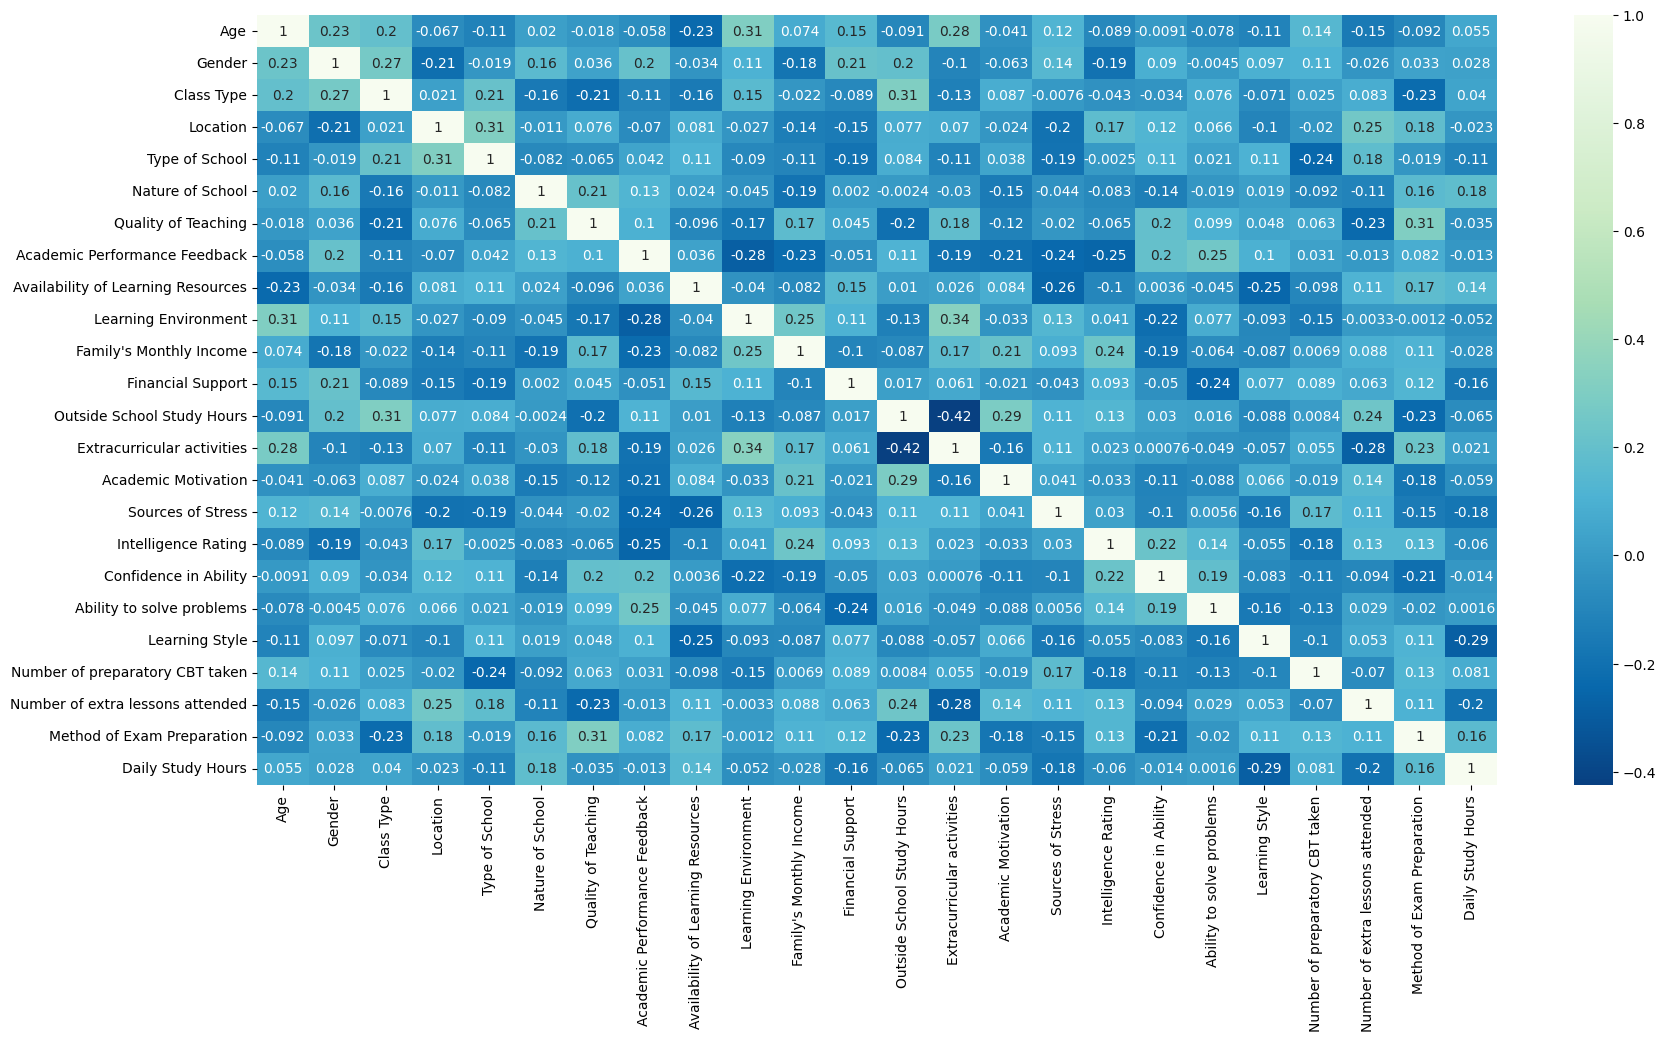

In [17]:
plt.figure(figsize=(20, 10))
sns.heatmap(features.corr(), annot=True, cmap='GnBu_r')
plt.show()

In [18]:
train_data["Jamb Score"] = train_data["Jamb Score"].astype("int64")

In [19]:
def categorize_target(x):
    if x<200:
        return 0
    elif (x>=200) & (x<=270):
        return 1
    else:
        return 2

In [20]:
train_data["JS_Category"] = train_data["Jamb Score"].apply(categorize_target)

In [21]:
train_data["JS_Category"]

,JS_Category
0,2
1,2
2,2
3,0
4,1
5,1
6,0
7,2
9,1
11,2


In [22]:
target = train_data["JS_Category"]

In [23]:
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=2)
X_train

,Age,Gender,Class Type,Location,Type of School,Nature of School,Quality of Teaching,Academic Performance Feedback,Availability of Learning Resources,Learning Environment,...,Academic Motivation,Sources of Stress,Intelligence Rating,Confidence in Ability,Ability to solve problems,Learning Style,Number of preparatory CBT taken,Number of extra lessons attended,Method of Exam Preparation,Daily Study Hours
12,2,0,0,2,0,1,2,2,0,4,...,3,10,3,3,4,4,1,3,1,2
34,2,1,2,1,1,1,2,4,1,2,...,0,2,3,3,4,9,0,3,1,1
68,1,0,2,2,0,1,2,2,0,2,...,0,1,3,1,4,8,1,3,3,2
45,2,1,2,0,0,0,2,2,2,3,...,0,0,1,3,2,3,2,0,1,4
20,1,0,2,1,0,1,1,2,0,2,...,0,0,3,0,0,9,2,2,3,4
66,1,1,2,2,1,0,1,2,3,3,...,0,2,3,3,4,2,1,3,2,2
70,1,0,2,2,1,0,1,1,0,2,...,3,7,3,1,3,3,0,3,1,1
33,2,1,2,2,0,1,1,2,0,4,...,2,3,3,3,2,9,1,0,0,0
60,0,1,2,2,1,1,2,4,2,1,...,2,8,3,3,4,5,2,2,2,1
14,1,1,2,2,1,1,0,4,1,2,...,0,6,0,1,3,12,3,3,2,2


In [24]:
scaler = StandardScaler()
scaledX_train = scaler.fit_transform(X_train)
scaledX_test = scaler.transform(X_test)

In [25]:
forest = RandomForestClassifier(random_state = 20, n_estimators = 500)
forest.fit(scaledX_train, y_train)

RandomForestClassifier(n_estimators=500, random_state=20)

In [26]:
pred_forest = forest.predict(scaledX_test)
pred_forest

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

In [27]:
print(classification_report(y_test, pred_forest))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00         1
           1       0.45      1.00      0.62         5
           2       0.00      0.00      0.00         5

    accuracy                           0.45        11
   macro avg       0.15      0.33      0.21        11
weighted avg       0.21      0.45      0.28        11



In [28]:
boost = XGBClassifier(random_state=10)
boost.fit(scaledX_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, objective='multi:softprob', ...)

In [29]:
pred_boost = boost.predict(scaledX_test)
pred_boost

array([1, 1, 2, 1, 1, 1, 1, 1, 0, 1, 1])

In [30]:
accuracy_score(y_test, pred_boost)

0.2727272727272727

In [31]:
importances = forest.feature_importances_
feature = features.columns
feature_importance = list(zip(feature, importances))
importance_df = pd.DataFrame(feature_importance, columns=["Feature", "Importance"]).sort_values(ascending=False, by= "Importance")

In [32]:
importance_df

,Feature,Importance
12,Outside School Study Hours,0.074472
13,Extracurricular activities,0.072934
19,Learning Style,0.070759
15,Sources of Stress,0.067561
10,Family's Monthly Income,0.066392
16,Intelligence Rating,0.055750
23,Daily Study Hours,0.050435
21,Number of extra lessons attended,0.049899
22,Method of Exam Preparation,0.047548
20,Number of preparatory CBT taken,0.044204


In [33]:
import pickle
# Specify the file path where you want to save the model
save_path = "jamb_model.pkl"

# Save the model as a pickle file
with open(save_path, 'wb') as file:
    pickle.dump(forest, file)      #the random forest was saved even though the xgboost performed a little better than it because xgboost requires installing more dependencies in the production environment


print("Model saved as pickle file.")

Model saved as pickle file.


In [34]:
import sklearn

sklearn.__version__

'1.5.2'